In [2]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
def double_exp_smooth(d, alpha=0.25, beta=0.25, extra_periods=5):
    n = len(d)
    f,l,t = np.full((3,n+extra_periods), np.nan)
    d = np.append(d,[np.nan]*extra_periods)
    l[0]=d[0]
    t[0]= d[1]-d[0]

    for i in range(1,n):
        f[i] = l[i-1] + t[i-1]

        l[i] = alpha*d[i] + (1-alpha)*(l[i-1]+t[i-1])
        t[i] = beta*(l[i]-l[i-1]) + (1-beta)*t[i-1]
    
    for i in range(n,n+extra_periods):
        f[i] = l[i-1] +t[i-1]
        l[i] = f[i]
        t[i] = t[i-1]
    
    df = pd.DataFrame({'Demand' : d, 'Forecast': f, 'Level': l, 'Trend': t, 'Error': f-d})
    return df

In [4]:
def kpi(df):
    dem_ave = df.loc[df['Error'].notnull(),'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs / dem_ave
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs,bias_rel))
    MAPE = (df['Error'].abs()/df['Demand']).mean()
    print('MAPE: {:.2%}'.format(MAPE))
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    print('MAE: {:0.2f}, {:.2%}'.format(MAE_abs,MAE_rel)) 
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs / dem_ave
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE_abs,RMSE_rel)) 

In [5]:
df = pd.read_csv('trimmed_data.csv')
d = np.array(df['Quantity'])

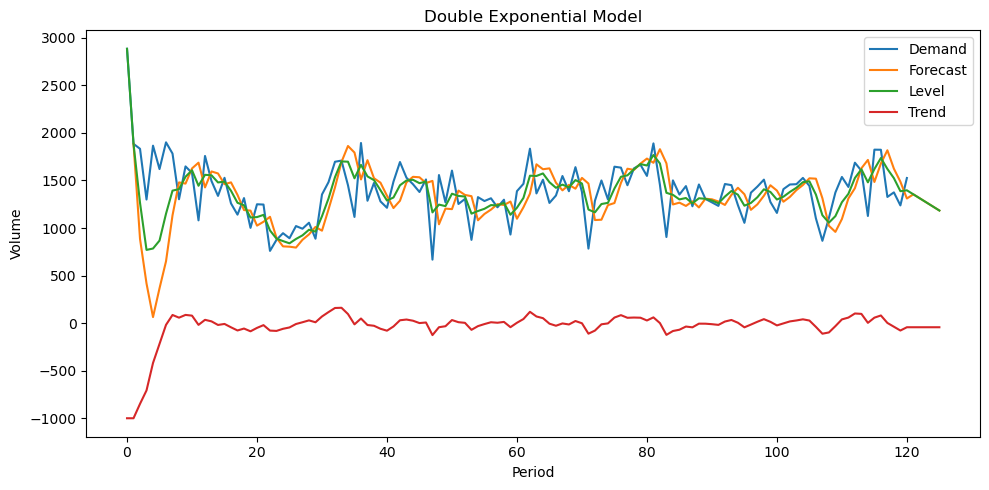

In [6]:
df2 = double_exp_smooth(d,0.4,0.4)
df2[['Demand','Forecast', 'Level', 'Trend']].plot(figsize=(10,5),xlabel = 'Period', ylabel= 'Volume', title= 'Double Exponential Model')
plt.tight_layout()
plt.savefig('Figures//double_exp_example.png')

In [22]:
df2 = double_exp_smooth(d,0.5,0.3)

<Axes: title={'center': 'Tree'}, xlabel='Period', ylabel='Volume'>

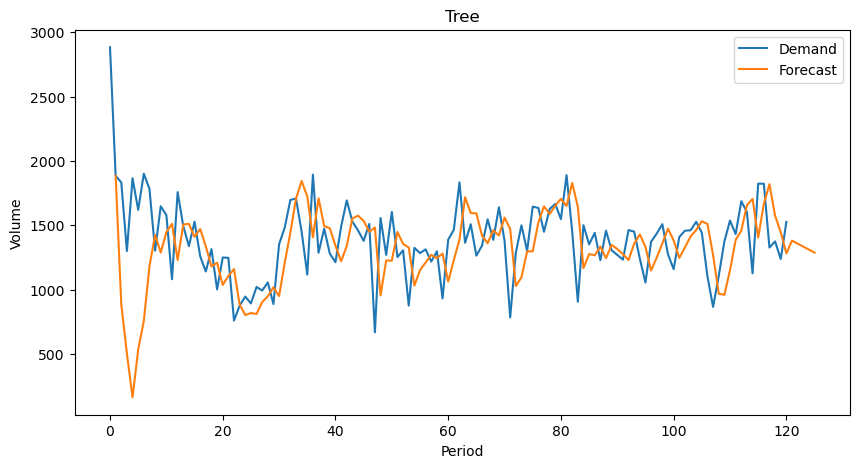

In [24]:
df2[['Demand','Forecast']].plot(figsize=(10,5),xlabel = 'Period', ylabel= 'Volume', title= 'Tree')


In [7]:
kpi(df2)

Bias: -49.82, -3.62%
MAPE: 20.54%
MAE: 269.04, 19.53%
RMSE: 381.59, 27.70%
